In [83]:
import pandas as pd
import numpy as np
import joblib

In [ ]:
# import data
df_viet = joblib.loac('sample_review.py') 
df_viet.head()

In [41]:
%pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

# test the Vader sentiment analysis function
text_1 = "The book was a perfect balance between wrtiting style and plot."
text_2 =  "The pizza tastes terrible."
sent_1 = sentiment.polarity_scores(text_1)
sent_2 = sentiment.polarity_scores(text_2)
print("Sentiment of text 1:", sent_1)
print("Sentiment of text 2:", sent_2)
    

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.4 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.
Sentiment of text 1: {'neg': 0.0, 'neu': 0.73, 'pos': 0.27, 'compound': 0.5719}
Sentiment of text 2: {'neg': 0.508, 'neu': 0.492, 'pos': 0.0, 'compound': -0.4767}


In [61]:
# Apply sentiment analysis and append negative, positive, neutral and compound scores to the review dataset
neg = []
pos = []
neu = []
compound = []
for i in range(len(df_viet['text'])):
    txt = df_viet['text'].values
    neg.append(sentiment.polarity_scores(txt[i])['neg'])
    pos.append(sentiment.polarity_scores(txt[i])['pos'])
    neu.append(sentiment.polarity_scores(txt[i])['neu'])
    compound.append(sentiment.polarity_scores(txt[i])['compound'])

df_viet['neg'] = neg
df_viet['pos'] = pos
df_viet['neu'] = neu
df_viet['sentiment_score'] = compound

In [76]:
# sanity check
df_viet.head()

,review_id,user_id,business_id,stars,useful,funny,cool,date,temp_yn,text,neg,pos,neu,sentiment_score,score2
68,fGYcFOHfQL4stYPdD3J47g,CgyCtH9CbLO7J_uO3cL7OA,PzhPMkaNYiKDTHoTG0r8rw,4.0,0,0,0,2016-09-18 22:43:18,1,After 3 weeks of working in the area I finally...,0.128,0.255,0.617,0.7629,0.744
3913,EwkeL8nm4vug3htgi0ZbsQ,_exJkgTPirjUjEUbQju2ow,PzhPMkaNYiKDTHoTG0r8rw,5.0,0,0,0,2017-04-19 12:34:20,1,Soup was fresh spicy and delicious! Wish it wa...,0.000,0.340,0.660,0.8513,1.000
4148,KRowK5RRz8IF2auM-8ROSw,zEuTnMbf5IEQ1TiEGWHVQg,PzhPMkaNYiKDTHoTG0r8rw,3.0,0,0,0,2018-09-03 02:20:28,1,A pho place that checks all the boxes but does...,0.071,0.147,0.783,0.8958,0.859
5487,66KUpAcnKRA3BB_BNSgjpw,X3APf4FSiOYg4BB6sdhJPw,PzhPMkaNYiKDTHoTG0r8rw,5.0,1,0,0,2018-07-07 22:45:43,1,Steamed buns for the adults. Beef & Broccoli f...,0.000,0.270,0.730,0.8750,1.000
6288,fFFHTE0tY1OFqV50Iiy92Q,CQW0mI3IXtOeVv5TNDuuhw,PzhPMkaNYiKDTHoTG0r8rw,5.0,0,0,0,2015-11-06 00:36:28,1,The spicy beef pho is wonderful. The broth is ...,0.000,0.467,0.533,0.9497,1.000


In [77]:
# Get summary statistics of sentiment relevant scores
df_viet[['neg', 'pos', 'neu', 'sentiment_score']].describe()

count    3696.000000
mean        0.038285
std         0.048478
min         0.000000
25%         0.000000
50%         0.024000
75%         0.058000
max         0.383000
Name: neg, dtype: float64

#### Compare the distribution of sentiment score (compound score) and five-star ratings

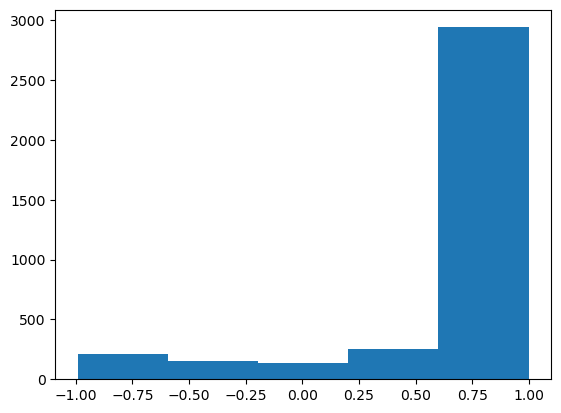

In [65]:
plt.figure()
plt.hist(df_viet['sentiment_score'], bins = 5)
plt.show()

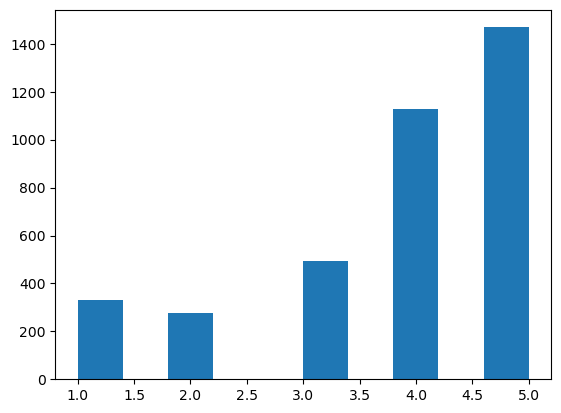

In [64]:
plt.figure()
plt.hist(df_viet['stars'])
plt.show()

#### Add another sentiment analysis packages that use more advanced models below. 

In [ ]:
%pip install -q transformers
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")
data = ["I love you", "I hate you"]
sentiment_pipeline(data)